## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  92.767863  1191.090362  0.833211  2.011829  1.425047
1  26.853504   360.257459  0.050141  1.882778  0.521903
2  10.984830  1244.418764  0.783612  1.330532  1.674006
3  17.597540  1252.808485  0.297712  4.328721  1.596679
4  21.106355   549.836868  0.056312  5.102948  1.102892


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9452629	total: 67.1ms	remaining: 1m 7s
1:	learn: 0.9385788	total: 67.6ms	remaining: 33.7s
2:	learn: 0.9311919	total: 68ms	remaining: 22.6s
3:	learn: 0.9225901	total: 68.4ms	remaining: 17s
4:	learn: 0.9132748	total: 68.9ms	remaining: 13.7s
5:	learn: 0.9065166	total: 69.3ms	remaining: 11.5s
6:	learn: 0.8992117	total: 69.9ms	remaining: 9.91s
7:	learn: 0.8894221	total: 70.4ms	remaining: 8.73s
8:	learn: 0.8817582	total: 70.9ms	remaining: 7.81s
9:	learn: 0.8760773	total: 71.4ms	remaining: 7.07s
10:	learn: 0.8691462	total: 71.8ms	remaining: 6.46s
11:	learn: 0.8617283	total: 72.2ms	remaining: 5.94s
12:	learn: 0.8530499	total: 72.6ms	remaining: 5.51s
13:	learn: 0.8465797	total: 73ms	remaining: 5.14s
14:	learn: 0.8398369	total: 73.5ms	remaining: 4.82s
15:	learn: 0.8325251	total: 73.9ms	remaining: 4.54s
16:	learn: 0.8241630	total: 74.3ms	remaining: 4.29s
17:	learn: 0.8162917	total: 74.8ms	remaining: 4.08s
18:	learn: 0.8123981	total: 75.2ms	remaining: 3.88

92:	learn: 0.4709970	total: 109ms	remaining: 1.06s
93:	learn: 0.4682543	total: 109ms	remaining: 1.05s
94:	learn: 0.4647839	total: 110ms	remaining: 1.04s
95:	learn: 0.4620221	total: 110ms	remaining: 1.03s
96:	learn: 0.4585521	total: 110ms	remaining: 1.03s
97:	learn: 0.4551554	total: 111ms	remaining: 1.02s
98:	learn: 0.4526472	total: 111ms	remaining: 1.01s
99:	learn: 0.4500563	total: 111ms	remaining: 1s
100:	learn: 0.4460911	total: 112ms	remaining: 994ms
101:	learn: 0.4442056	total: 112ms	remaining: 987ms
102:	learn: 0.4415014	total: 113ms	remaining: 980ms
103:	learn: 0.4390002	total: 113ms	remaining: 974ms
104:	learn: 0.4363685	total: 113ms	remaining: 967ms
105:	learn: 0.4340168	total: 114ms	remaining: 960ms
106:	learn: 0.4330245	total: 114ms	remaining: 954ms
107:	learn: 0.4312859	total: 115ms	remaining: 948ms
108:	learn: 0.4279931	total: 115ms	remaining: 942ms
109:	learn: 0.4265893	total: 116ms	remaining: 936ms
110:	learn: 0.4252944	total: 116ms	remaining: 931ms
111:	learn: 0.4229461	t

272:	learn: 0.2074031	total: 186ms	remaining: 496ms
273:	learn: 0.2066943	total: 187ms	remaining: 496ms
274:	learn: 0.2059868	total: 187ms	remaining: 494ms
275:	learn: 0.2054016	total: 188ms	remaining: 493ms
276:	learn: 0.2047085	total: 188ms	remaining: 492ms
277:	learn: 0.2034592	total: 189ms	remaining: 490ms
278:	learn: 0.2026451	total: 189ms	remaining: 489ms
279:	learn: 0.2016307	total: 190ms	remaining: 488ms
280:	learn: 0.2009537	total: 190ms	remaining: 486ms
281:	learn: 0.2002161	total: 190ms	remaining: 485ms
282:	learn: 0.1992121	total: 191ms	remaining: 484ms
283:	learn: 0.1981180	total: 191ms	remaining: 483ms
284:	learn: 0.1970070	total: 192ms	remaining: 481ms
285:	learn: 0.1961439	total: 192ms	remaining: 480ms
286:	learn: 0.1953278	total: 193ms	remaining: 479ms
287:	learn: 0.1947573	total: 193ms	remaining: 478ms
288:	learn: 0.1939587	total: 194ms	remaining: 478ms
289:	learn: 0.1930363	total: 195ms	remaining: 477ms
290:	learn: 0.1920005	total: 195ms	remaining: 475ms
291:	learn: 

504:	learn: 0.1102790	total: 291ms	remaining: 285ms
505:	learn: 0.1099448	total: 291ms	remaining: 284ms
506:	learn: 0.1096869	total: 292ms	remaining: 284ms
507:	learn: 0.1093485	total: 292ms	remaining: 283ms
508:	learn: 0.1090256	total: 292ms	remaining: 282ms
509:	learn: 0.1087733	total: 293ms	remaining: 281ms
510:	learn: 0.1083996	total: 293ms	remaining: 281ms
511:	learn: 0.1080884	total: 294ms	remaining: 280ms
512:	learn: 0.1074060	total: 294ms	remaining: 279ms
513:	learn: 0.1070880	total: 295ms	remaining: 279ms
514:	learn: 0.1064210	total: 295ms	remaining: 278ms
515:	learn: 0.1061411	total: 295ms	remaining: 277ms
516:	learn: 0.1054896	total: 296ms	remaining: 277ms
517:	learn: 0.1051435	total: 296ms	remaining: 276ms
518:	learn: 0.1046241	total: 297ms	remaining: 275ms
519:	learn: 0.1043559	total: 297ms	remaining: 274ms
520:	learn: 0.1037281	total: 298ms	remaining: 274ms
521:	learn: 0.1032680	total: 298ms	remaining: 273ms
522:	learn: 0.1030084	total: 299ms	remaining: 272ms
523:	learn: 

674:	learn: 0.0693964	total: 368ms	remaining: 177ms
675:	learn: 0.0691014	total: 368ms	remaining: 177ms
676:	learn: 0.0690052	total: 369ms	remaining: 176ms
677:	learn: 0.0688769	total: 369ms	remaining: 175ms
678:	learn: 0.0688299	total: 370ms	remaining: 175ms
679:	learn: 0.0686383	total: 370ms	remaining: 174ms
680:	learn: 0.0682549	total: 371ms	remaining: 174ms
681:	learn: 0.0682084	total: 371ms	remaining: 173ms
682:	learn: 0.0681629	total: 372ms	remaining: 172ms
683:	learn: 0.0679774	total: 372ms	remaining: 172ms
684:	learn: 0.0676023	total: 372ms	remaining: 171ms
685:	learn: 0.0675573	total: 373ms	remaining: 171ms
686:	learn: 0.0675080	total: 373ms	remaining: 170ms
687:	learn: 0.0673058	total: 374ms	remaining: 170ms
688:	learn: 0.0672590	total: 374ms	remaining: 169ms
689:	learn: 0.0671542	total: 375ms	remaining: 168ms
690:	learn: 0.0669750	total: 375ms	remaining: 168ms
691:	learn: 0.0666094	total: 375ms	remaining: 167ms
692:	learn: 0.0665643	total: 376ms	remaining: 166ms
693:	learn: 

918:	learn: 0.0407324	total: 471ms	remaining: 41.6ms
919:	learn: 0.0406045	total: 472ms	remaining: 41ms
920:	learn: 0.0405507	total: 472ms	remaining: 40.5ms
921:	learn: 0.0404977	total: 473ms	remaining: 40ms
922:	learn: 0.0403716	total: 473ms	remaining: 39.5ms
923:	learn: 0.0403192	total: 474ms	remaining: 39ms
924:	learn: 0.0402675	total: 474ms	remaining: 38.4ms
925:	learn: 0.0401431	total: 475ms	remaining: 37.9ms
926:	learn: 0.0400921	total: 475ms	remaining: 37.4ms
927:	learn: 0.0400417	total: 475ms	remaining: 36.9ms
928:	learn: 0.0399191	total: 476ms	remaining: 36.4ms
929:	learn: 0.0398694	total: 476ms	remaining: 35.9ms
930:	learn: 0.0398509	total: 477ms	remaining: 35.3ms
931:	learn: 0.0397300	total: 477ms	remaining: 34.8ms
932:	learn: 0.0395936	total: 477ms	remaining: 34.3ms
933:	learn: 0.0395449	total: 478ms	remaining: 33.8ms
934:	learn: 0.0394989	total: 478ms	remaining: 33.2ms
935:	learn: 0.0394510	total: 479ms	remaining: 32.7ms
936:	learn: 0.0394328	total: 479ms	remaining: 32.2ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

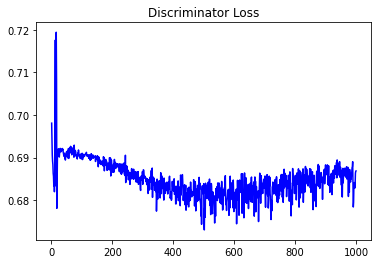

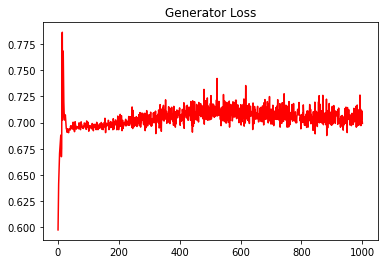

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.8548392690156513


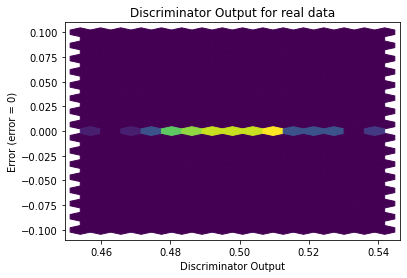

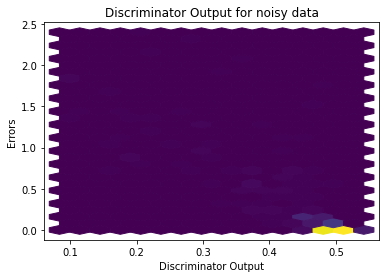

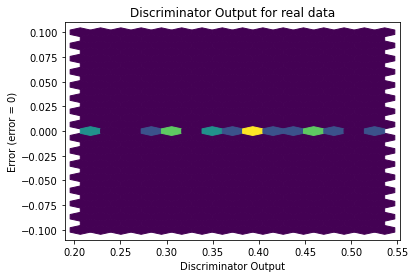

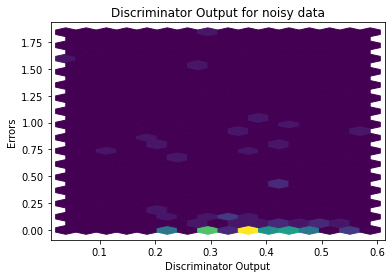

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


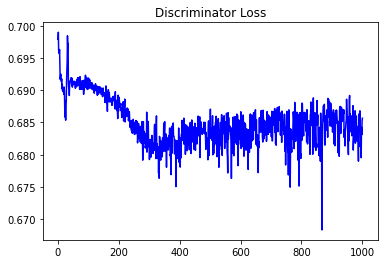

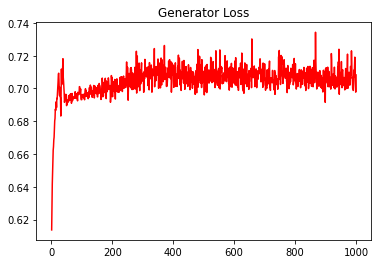

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.7867856291541868


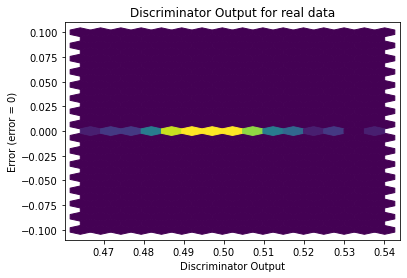

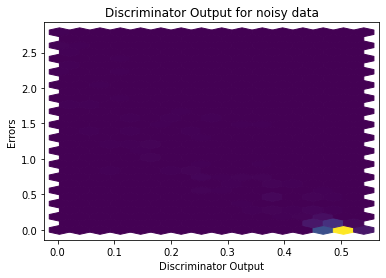

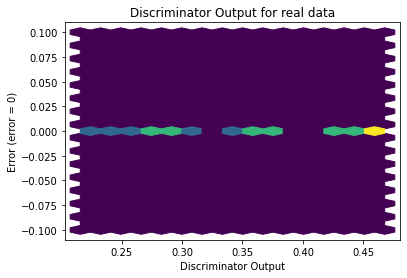

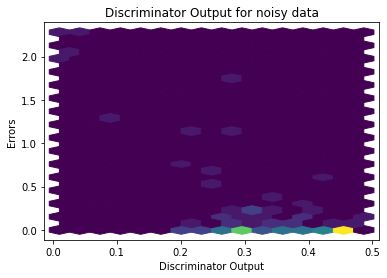

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8663]], requires_grad=True)
